In [3]:
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image
from torchvision.transforms import Resize

vocabulary = 'abcdefghijklmnopqrstuvwxyz1234567890\'\"! '

charToToken = {}
tokenToChar = {}

class OcrDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels, self.img_dir = self.preprocess(annotations_file)
        self.max_sentence_len = len(self.max_sentence())
        self.img_labels = self.encode_labels()
#         self.img_labels = self.data['text']
#         self.img_dir = self.data['img_path']
        self.transform = transform
        self.target_transform = target_transform

    def max_sentence(self):
        sentence = ''
        for label in self.img_labels:
            if len(label) > len(sentence):
                sentence = label
        return sentence
    
    def preprocess(self, path):
        img_labels, img_dirs = [], []
        with open(path, 'r') as f:     
            lines = f.readlines()
            for line in lines:
                line = line.rstrip()
                line_split = line.split('\t', 1)
                img_dirs.append(line_split[0])
                img_labels.append(line_split[1])

        return img_labels, img_dirs

    def encode_labels(self):
        """
        This function will create a one-hot encoding of the characters for each sentence. 
        The target dimensions will be number_of_sentences * max_sentence_length * 36 (our vocabulary),
        where each 36-dimensional vector will contain a one-hot encoding of the characters at a specific
        position in the sentence.
        """
        target_labels = []
        char_idx = 0
        for label in self.img_labels:
            sentence_vector = [[0 for i in range(len(vocabulary))] \
                               for i in range(self.max_sentence_len)]
            for i, char in enumerate(label):
                char = char.lower()
                if char not in charToToken and char in vocabulary:
                    charToToken[char] = char_idx
                    tokenToChar[char_idx] = char
                    char_idx += 1
                # get the index of the character in the vocabulary
                char_pos = vocabulary.find(char)
                sentence_vector[i][char_pos] = 1
            target_labels.append(sentence_vector)
        return target_labels
    
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
          img_path = os.path.join('IAM/image', self.img_dir[idx])
          image = read_image(img_path)
#         label = self.img_labels.iloc[idx, 1]
          if self.transform:
              image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
        
#         return image, label
          return image, self.img_labels[idx]

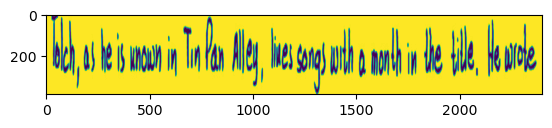

In [15]:
training_data = OcrDataset(annotations_file='IAM/gt_test.csv',img_dir='IAM/image',transform=Resize((384,2400)))
img,label = training_data.__getitem__(6)
plt.imshow(img[0,:,:])
# print(label)

In [5]:
test = pd.read_csv('IAM/gt_test.csv',delimiter='\t',header=None)
test.head()

,0,1
0,c04-110-00.jpg,Become a success with a disc and hey presto ! ...
1,c04-110-01.jpg,"assuredness "" Bella Bella Marie "" ( Parlophone..."
2,c04-110-02.jpg,I don't think he will storm the charts with th...
3,c04-110-03.jpg,"CHRIS CHARLES , 39 , who lives in Stockton-on-..."
4,c04-116-00.jpg,He is also a director of a couple of garages ....


In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data,batch_size=32, shuffle=True)
# test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [7]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {len(train_labels)}")

Feature batch shape: torch.Size([32, 1, 384, 2400])
Labels batch shape: 93


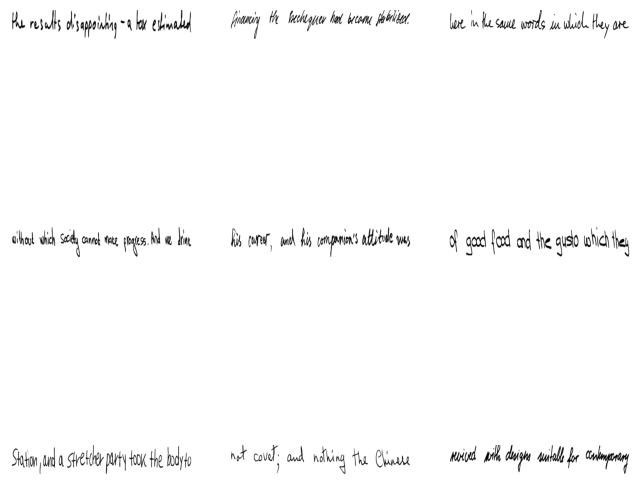

In [8]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
#     plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [16]:
training_data[1][1]

[[1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 